# Assignment 3-1
## Topic: Using the Keras Functional API (2 points)

Create a neural network with identical multiple inputs as shown in the image below.
* The number of neurons in the layers or the activation function does not matter, define them yourself freely.


In [8]:
# Write your information here!
student_name = 'Vuong Quang Phat - Hua Trung Hieu'
student_email = "ac4933@student.jamk.fi - ag1802@student.jamk.fi"



Tips:
* Use the `Concatenate` layer to combine the `Input2` and the third `Dense` layer into the input of the `Dense` layer shown in the left image.
* Use the `Concatenate` layer to combine the `Input3` and the third `Dense` layer as the input of the `Dense` layer shown in the right image.

* Hint: `Add` layer documentation: [https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add?hl=th)

Tip! See the following diagram before starting to create an identical model with Keras:

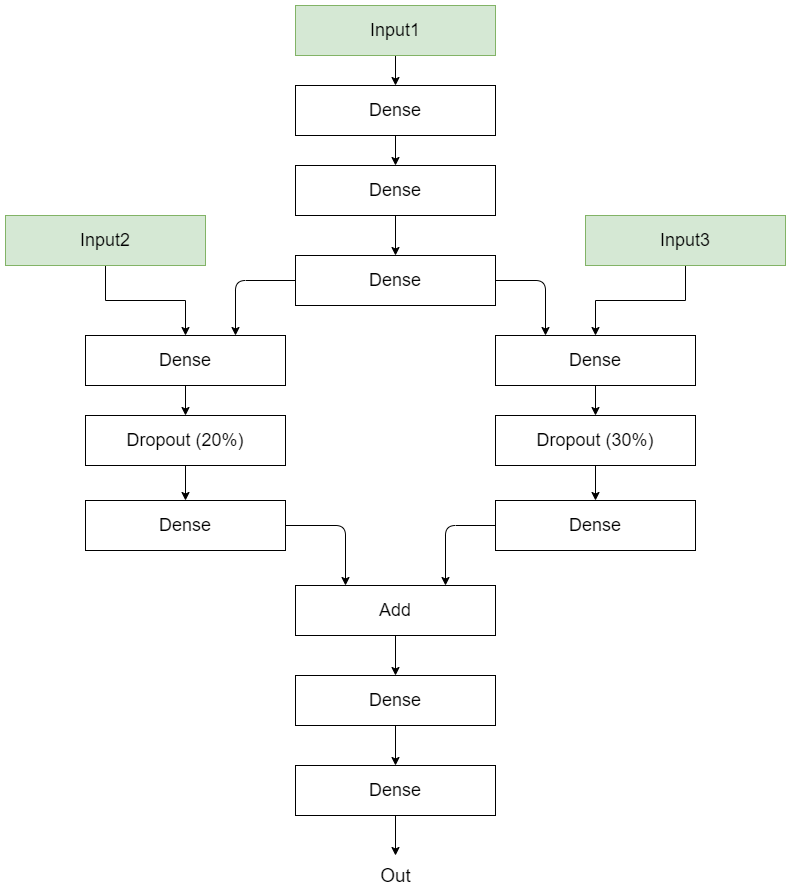

In [9]:
from IPython.display import Image
Image('../img/keras_functional_task.png')

In [10]:
# TODO: Implementation of the assignment
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Add
from tensorflow.keras.models import Model

# TODO: define three input layer
# input1, input2, input3 = tf.keras.Input(shape=(10,)) ... )
input1 = tf.keras.Input(shape=(10,), name="Input1")
input2 = tf.keras.Input(shape=(10,), name="Input2")
input3 = tf.keras.Input(shape=(10,), name="Input3")


x = Dense(32, activation="relu", name="Dense1")(input1)
x = Dense(16, activation="relu", name="Dense2")(x)

# TODO: Middle layer
# middle_dense1 = tf.keras.layers.Dense(...)(input1)
middle_dense = Dense(8, activation="relu", name="MiddleDense")(x)

# TODO: left branch
# left_concat = tf.keras.layers.concatenate(...)
left_concat = tf.keras.layers.concatenate([middle_dense, input2], name="LeftConcat")
left_dense1 = Dense(16, activation="relu", name="LeftDense1")(left_concat)
left_dropout = Dropout(0.2, name="LeftDropout")(left_dense1)
left_dense2 = Dense(8, activation="relu", name="LeftDense2")(left_dropout)

# TODO: right branch
right_concat = tf.keras.layers.concatenate([middle_dense, input3], name="RightConcat")
right_dense1 = Dense(16, activation="relu", name="RightDense1")(right_concat)
right_dropout = Dropout(0.3, name="RightDropout")(right_dense1)
right_dense2 = Dense(8, activation="relu", name="RightDense2")(right_dropout)

# TODO: join the left and right branches to the Add layer
merged = Add(name="MergedLayer")([left_dense2, right_dense2])

# TODO: Set the model you created in the model_functional variable.
final_dense1 = Dense(16, activation="relu", name="FinalDense1")(merged)
final_dense2 = Dense(8, activation="relu", name="FinalDense2")(final_dense1)
output = Dense(1, activation="sigmoid", name="Output")(final_dense2)

# model_functional = tf.keras.Model(inputs= ..., outputs=...)
model_functional = Model(inputs=[input1, input2, input3], outputs=output)

model_functional.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input1 (InputLayer) │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense1 (Dense)      │ (None, 32)        │        352 │ Input1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense2 (Dense)      │ (None, 16)        │        528 │ Dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MiddleDense (Dense) │ (None, 8)         │        136 │ Dense2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input2 (InputLayer) │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input3 (InputLayer) │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftConcat          │ (None, 18)        │          0 │ MiddleDense[0][0… │
│ (Concatenate)       │                   │            │ Input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightConcat         │ (None, 18)        │          0 │ MiddleDense[0][0… │
│ (Concatenate)       │                   │            │ Input3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftDense1 (Dense)  │ (None, 16)        │        304 │ LeftConcat[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightDense1 (Dense) │ (None, 16)        │        304 │ RightConcat[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftDropout         │ (None, 16)        │          0 │ LeftDense1[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightDropout        │ (None, 16)        │          0 │ RightDense1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftDense2 (Dense)  │ (None, 8)         │        136 │ LeftDropout[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightDense2 (Dense) │ (None, 8)         │        136 │ RightDropout[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MergedLayer (Add)   │ (None, 8)         │          0 │ LeftDense2[0][0], │
│                     │                   │            │ RightDense2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FinalDense1 (Dense) │ (None, 16)        │        144 │ MergedLayer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FinalDense2 (Dense) │ (None, 8)         │        136 │ FinalDense1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │          9 │ FinalDense2[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,185 (8.54 KB)

 Trainable params: 2,185 (8.54 KB)

 Non-trainable params: 0 (0.00 B)

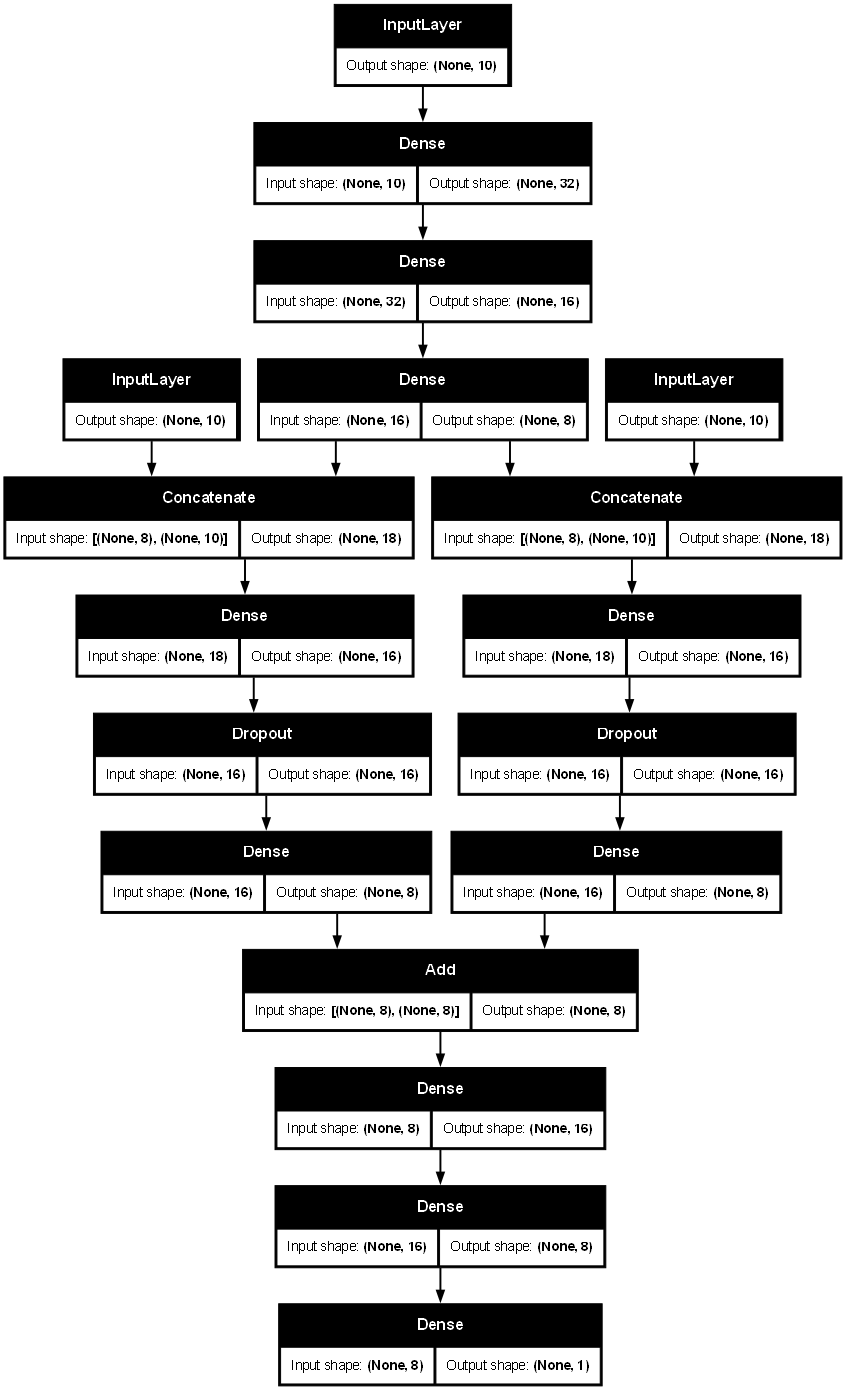

In [11]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment. Set the model you created in the model_functional variable.
# Required libraries
from IPython.display import SVG

from tensorflow.keras.utils import plot_model

# TODO: Let's draw the image directly to the Notebook document with the SVG class
#  or with f.keras.utils.model_to_dot()
tf.keras.utils.plot_model(model_functional, dpi=70, show_shapes=True, expand_nested=True)


In [12]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment. Set the model you created in the model_functional variable.
model_functional.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input1 (InputLayer) │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense1 (Dense)      │ (None, 32)        │        352 │ Input1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Dense2 (Dense)      │ (None, 16)        │        528 │ Dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MiddleDense (Dense) │ (None, 8)         │        136 │ Dense2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input2 (InputLayer) │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input3 (InputLayer) │ (None, 10)        │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftConcat          │ (None, 18)        │          0 │ MiddleDense[0][0… │
│ (Concatenate)       │                   │            │ Input2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightConcat         │ (None, 18)        │          0 │ MiddleDense[0][0… │
│ (Concatenate)       │                   │            │ Input3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftDense1 (Dense)  │ (None, 16)        │        304 │ LeftConcat[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightDense1 (Dense) │ (None, 16)        │        304 │ RightConcat[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftDropout         │ (None, 16)        │          0 │ LeftDense1[0][0]  │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightDropout        │ (None, 16)        │          0 │ RightDense1[0][0] │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ LeftDense2 (Dense)  │ (None, 8)         │        136 │ LeftDropout[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ RightDense2 (Dense) │ (None, 8)         │        136 │ RightDropout[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ MergedLayer (Add)   │ (None, 8)         │          0 │ LeftDense2[0][0], │
│                     │                   │            │ RightDense2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FinalDense1 (Dense) │ (None, 16)        │        144 │ MergedLayer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ FinalDense2 (Dense) │ (None, 8)         │        136 │ FinalDense1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Output (Dense)      │ (None, 1)         │          9 │ FinalDense2[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,185 (8.54 KB)

 Trainable params: 2,185 (8.54 KB)

 Non-trainable params: 0 (0.00 B)

# Assignment 3-2
### Topic: Convolutional neural network and feature matrices (4 points)

**Background**

`Conv2D` layers transform the input image into a mathematical model that is used by tightly coupled layers to create a classification.
Since `Dense` layers can only handle 1D data, first the multidimensional feature map given by the last `Conv2D` layer must be converted to 1D format using the `Flatten` layer.

The following information is required for model configuration:

* the batch size is set to 50. These 50 samples are fed to the model at each step.
* Images are 32×32 pixel RGB images and are set to (32, 32, 3)
* Loss function is `sparse_categorical_crossentropy` and `optimizer` is `Adam()`
* There are 10 different classes in the data.
* The number of epoch cycles is only five (5) iterations. In real apps, there may be 50-100 rounds, but when doing assignments, additional rounds are not more useful.
* 20% of the data is testing data.
* 80% of the data is training data.

### Input data preprocessing

* Before fitting the neural network, convert the data to `float32` format, resulting in a faster training process on GPU processing.
* Data scaling ensures that the weight updates are smaller, which improves the final output and eases data processing.

### Building a deep learning model

When using this layer as the first layer in a model, you should provide the keyword argument `input_shape`.
In this example, these inputs are 28x28 RGB images with `channels_last`:

```>>> input_shape = (28, 28, 3)
>>> convLayer = tf.keras.layers.Conv2D(filters, kernel_size=(3, 3), activation='relu', input_shape=input_shape)
```

1. In the assignment, two `Conv2D` layers are specified in consecutive order (3×3 kernel size + ReLU activation),
    and the numbers of filters for them are 32 and 64.
2. Next, we use the `Flatten` layer to convert the data into a 1D format.
3. There are two `Dense` layers (number of filters 64 and 10) to generate the classification.
   The last layer is not activated with ReLU, but with Softmax, resulting in a multi-class probability distribution in response to the question
   "which class is most likely?".

#### Compiling and fitting the model

After defining the deep learning architecture, we can build the model and fit the data and start test phase with test dataset.

1. Compile the model (`model.compile`)
2. Fit the data to the model (`model.fit`)
3. Evaluate model results (`model.evaluate`) using separate test data.

**Evaluating and printing:**
```
Test loss: ??? and Test accuracy: ???
```

In [13]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

# Load CIFAR-10 dataset
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Scale the pixel values to range [0,1]
input_train, input_test = input_train.astype('float32') / 255.0, input_test.astype('float32') / 255.0

# Define the model
model = Sequential([
    Input(shape=(32, 32, 3)),  # Explicit input layer
    Conv2D(32, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),  # Normalize activations for stable training
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.2),

    Conv2D(64, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.3),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(input_train, target_train, batch_size=50, epochs=5, validation_data=(input_test, target_test))


Epoch 1/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 48s 44ms/step - accuracy: 0.1949 - loss: 2.1608 - val_accuracy: 0.3992 - val_loss: 1.6834
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.3165 - loss: 1.8045 - val_accuracy: 0.3556 - val_loss: 1.6987
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.4030 - loss: 1.5887 - val_accuracy: 0.4999 - val_loss: 1.3812
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.4469 - loss: 1.4696 - val_accuracy: 0.4965 - val_loss: 1.3616
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.4999 - loss: 1.3622 - val_accuracy: 0.5618 - val_loss: 1.2462


In [14]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.

# TODO: Create a summary of the model and print evaluation metrics
model.summary()
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Loss: {score[0]} and accuracy: {score[1]}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 950,432 (3.63 MB)

 Trainable params: 316,746 (1.21 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 633,494 (2.42 MB)

Loss: 1.2461673021316528 and accuracy: 0.5618000030517578


#### Tips

* Use 'relu' as activation function in `Conv2D` layers
* How many filters need to be defined?
* In convolution layers, the kernel size is (5,5). What the padding and stride should be, that the output has the same width and height as the input.
* In `MaxPooling2D`, pool_size is (2,2). What should be the `strides` parameter to halve the input?
* `Dropout` deactivates 20% of the neurons in the first `Dropout` layer, and it deactivates 40% in the second `Dropout` layer.

# Assignment 3-3
## Topic: Classification of News headlines using the RNN model (4 p)

Here, data is classified on the basis of whether it is a so-called _clickbait or not_.

The assignment uses the following data:
[https://github.com/bhargaviparanjape/clickbait/tree/master/dataset](https://github.com/bhargaviparanjape/clickbait/tree/master/dataset)

Basic algorithm for the implementation of the assignment:

1. Download the data from the **clickbait_data.txt** and **non_clickbait_data.txt** files
2. Let's label the titles in a category (is a clickbait == 1 or is not a clickbait == 0)
3. Split the data into training and test data (75% training data and 25% test data split)
4. Create an RNN model that predicts whether the title is a clickbait title or not
5. Predict the accuracy of the model with the `evaluate` function

Tips:

* Use `tf.keras.preprocessing.text.Tokenizer` class for numeric conversion
* Create sequences of the same length from titles: (`num_words=number_of_words`)

### RNN or LSTM

_Recurrent neural networks_ (**RNN**) are particularly well suited for sequential data. Well-known practical applications of RNN include e.g. Google's voice search and Apple's Siri.

* RNN has internal memory.
* RNN is a deep learning algorithm that can remember the input.
* Applications of RNN are **LSTM** and **GRU**
* RNN is the recommended algorithm for sequential data, e.g., for written text, time series, weather forecasts, economic data, etc.

In an RNN, the data circulates in an internal loop. When the RNN calculates the output layer, it also considers the previous layer and also the layer before it, because it has short-term memory.

## The assignment can be done in two different ways

When grading this assignment, it is sufficient that you have implement the solutions to this problem by using of the following methods:
1. `SimpleRNN`
2. `LSTM` - the preferred method for this assignment.

In [15]:
# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.

# TODO: Put the result of the model.evaluate() function in the results variable.
# TODO: set metrics=['accuracy'] to monitor in model.compile() to see how much of the neural network's predictions is correct at different stages of training.


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

# TODO: Load the dataset
clickbait_file = "data/clickbait_data.txt"
non_clickbait_file = "data/non_clickbait_data.txt"

with open(clickbait_file, "r", encoding="utf-8") as f:
    clickbait_titles = f.readlines()
with open(non_clickbait_file, "r", encoding="utf-8") as f:
    non_clickbait_titles = f.readlines()

# Label the data (clickbait: 1, non-clickbait: 0)
titles = clickbait_titles + non_clickbait_titles
labels = [1] * len(clickbait_titles) + [0] * len(non_clickbait_titles)

# TODO: Tokenization
num_words = 10000  # Define vocabulary size
tokenizer = Tokenizer(num_words=num_words, oov_token="<OOV>")
tokenizer.fit_on_texts(titles)
sequences = tokenizer.texts_to_sequences(titles)
padded_sequences = pad_sequences(sequences, padding='post')

# Convert labels to numpy array
labels = np.array(labels)

# TODO: Split into training and testing sets
split = int(0.75 * len(padded_sequences))
train_data, test_data = padded_sequences[:split], padded_sequences[split:]
train_labels, test_labels = labels[:split], labels[split:]

# TODO: Create an RNN model
model = Sequential([
    Embedding(input_dim=num_words, output_dim=16),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# TODO: Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# TODO: Train the model
model.fit(train_data, train_labels, epochs=5, batch_size=32, validation_data=(test_data, test_labels))

# Answers to the assignment.
# Note! Do not edit this cell, just run it after you complete the assignment.

# TODO: Evaluate the model
results = model.evaluate(test_data, test_labels, verbose=0)

print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

Epoch 1/5
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8214 - loss: 0.4329 - val_accuracy: 0.5671 - val_loss: 0.6388
Epoch 2/5
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 28s 21ms/step - accuracy: 0.8922 - loss: 0.2712 - val_accuracy: 0.5981 - val_loss: 0.6199
Epoch 3/5
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.8924 - loss: 0.2653 - val_accuracy: 0.5693 - val_loss: 0.6799
Epoch 4/5
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.8976 - loss: 0.2536 - val_accuracy: 0.5959 - val_loss: 0.6692
Epoch 5/5
1360/1360 ━━━━━━━━━━━━━━━━━━━━ 27s 20ms/step - accuracy: 0.8987 - loss: 0.2488 - val_accuracy: 0.5835 - val_loss: 0.6941
Test Loss:0.6941275596618652 Test Accuracy:58.3545982837677%
